#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**Also good to know section, power loaw distribution**

using the city-size-japan dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/city-size-japan/clean/"
data_out = dirname + "da_case_studies/ch03-city-size-japan/"
output = dirname + "da_case_studies/ch03-city-size-japan/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [4]:
city_size = pd.read_csv(data_in + "city-size-japan.csv")

#### Create variables

In [5]:
city_size["pop"] = city_size["pop_2015"] / 1000
city_size["lnpop"] = np.log(city_size["pop"])

In [6]:
city_size = city_size.sort_values(by="pop", ascending=False).reset_index(drop=True)
city_size["rank"] = [x for x in range(1, city_size.shape[0] + 1)]
city_size["lnrank"] = np.log(city_size["rank"])

#### ln(rank) vs ln(population) plot

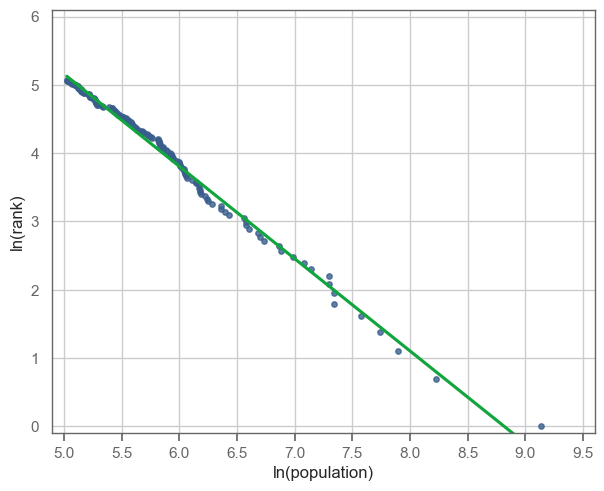

In [7]:
fig = sns.regplot(
    x="lnpop",
    y="lnrank",
    data=city_size,
    scatter_kws={"s": 15},
    line_kws={"color": da.color[1]},
    ci=None,
)

plt.xlabel("ln(population)")
plt.ylabel("ln(rank)")
plt.ylim(-0.1, 6.1)
plt.yticks(np.arange(0, 7, 1))
plt.xlim(4.9, 9.6)
plt.xticks(np.arange(5, 9.6, 0.5))
plt.show()

#### scale invariance


In [8]:
x1 = 200
x2 = 300
bound = 0.2

In [9]:
city_size.loc[
    (city_size["pop"] >= x1 * (1 - bound)) & (city_size["pop"] <= x1 * (1 + bound))
].shape[0]

56

In [10]:
city_size.loc[
    (city_size["pop"] >= x2 * (1 - bound)) & (city_size["pop"] <= x2 * (1 + bound))
].shape[0]

37

In [11]:
shift = 3
x3 = x1 * shift
x4 = x2 * shift

In [12]:
city_size.loc[
    (city_size["pop"] >= x3 * (1 - bound)) & (city_size["pop"] <= x3 * (1 + bound))
].shape[0]

13

In [13]:
city_size.loc[
    (city_size["pop"] >= x4 * (1 - bound)) & (city_size["pop"] <= x4 * (1 + bound))
].shape[0]

7